## Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Этап 1


In [1]:
import pandas as pd

data = pd.read_csv('real_estate_data.csv', index_col=0)

data.head(15)

""
total_images last_price total_area first_day_exposition rooms ceiling_height floors_total living_area floor is_apartment studio open_plan kitchen_area balcony locality_name airports_nearest cityCenters_nearest parks_around3000 parks_nearest ponds_around3000 ponds_nearest days_exposition
20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\t2.7\t16.0\t51.0\t8\t\tFalse\tFalse\t25.0\t\tСанкт-Петербург\t18863.0\t16028.0\t1.0\t482.0\t2.0\t755.0\t
7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t11.0\t18.6\t1\t\tFalse\tFalse\t11.0\t2.0\tпосёлок Шушары\t12817.0\t18603.0\t0.0\t\t0.0\t\t81.0
10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\t5.0\t34.3\t4\t\tFalse\tFalse\t8.3\t0.0\tСанкт-Петербург\t21741.0\t13933.0\t1.0\t90.0\t2.0\t574.0\t558.0
0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t\t14.0\t\t9\t\tFalse\tFalse\t\t0.0\tСанкт-Петербург\t28098.0\t6800.0\t2.0\t84.0\t3.0\t234.0\t424.0
2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t3.03\t14.0\t32.0\t13\t\tFalse\tFalse\t41.0\t\tСанкт-Петербург\t31856.0\t8098.0\t2.0\t112.0\t1.0\t48.0\t121.0
10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\t12.0\t14.4\t5\t\tFalse\tFalse\t9.1\t\tгородской посёлок Янино-1\t\t\t\t\t\t\t55.0
6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t26.0\t10.6\t6\t\tFalse\tFalse\t14.4\t1.0\tпосёлок Парголово\t52996.0\t19143.0\t0.0\t\t0.0\t\t155.0
5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t24.0\t\t22\t\tFalse\tFalse\t18.9\t2.0\tСанкт-Петербург\t23982.0\t11634.0\t0.0\t\t0.0\t\t
20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t\t27.0\t15.43\t26\t\tFalse\tFalse\t8.81\t\tпосёлок Мурино\t\t\t\t\t\t\t189.00000000000003


Значения в таблице данных отделены с помощью табуляции **(\t)**

Избавимся от этого, дописав аргумент **sep**

In [2]:
data = pd.read_csv('real_estate_data.csv',sep='\t')

display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Описание данных

* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.shape

(23699, 22)

## Вывод

1. В данных имеются пропуски, по предварительному анализу в некоторых столбцах имеется логичное их объяснение, например, отсутствие балкона в квартире, ближайщего водоёма или парка обозначаются **NaN**, но это стоит ещё проверить;
2. Типы данных в некоторых столбцах следует изменить. **balcony** содержит информацию о количестве балконов в квартире, поэтому тип данных должен быть целочисленные значения **(int)**, также в столбцах **floors_total, parks_around3000, ponds_around3000,days_exposition.** Также стоит проверить **last_price**, где тоже следует заменить тип данных на **(int)**.
3. **first_day_exposition** имеет формат времени, содержащий дату (год:месяц:день) и время (час:минуты:секунды). Для анализа не так важно в каком часу была размещена публикация с точностью до секунды, к тому же время на первых данных везде 00:00:00, поэтому стоит избавиться от такого формата записи;
4. **studio, open_plan** имеют тип данных **bool**, также столбец **is_apartment** имеет тип данных **object**, содержащий на первый взгляд булевые значения **False**, а также пропуски **NaN**. Нужно выяснить соответсвует ли пропуски значению **True** и перевести тип данных в **bool**;	
5. Данные в **locality_name** имеют очень широкий охват по населённым пунктам вблизи Санкт-Петербурга, было бы проще разбить их на категории **/Санкт-Петербург/** и **/пригород/**, к тому же расстояние до центра города **cityCenters_nearest** явно указаны до центра Санкт-Петербурга;
6. Правильно отформатирована колонка **total_images, rooms и floor**;
7. Предстоит заполнить пропуски, обработать цену, создать дополнительные категории для оценки рынка недвижимости и определения рыночной стоимости объектов недвижимости.

# Этап 2

## Предобработка данных


1. Приведём данные к нужным типам


2. Определим и изучим пропущенные значения:
    * Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.




Проверим наличие дубликатов в данных

In [5]:
data.duplicated().sum()

0

Дубликатов в наших данных нет, что довольно неплохо.

Данные в **last_price** приведены как **(float64)**, а нам нужны целочисленные значения. 
Переведем все занчения в **(int)**:

In [6]:
data['last_price'] = data['last_price'].apply(int)
data['last_price'].dtype

dtype('int64')

**last_price** выглядит так, будто всё в порядке. В этой колонке пропущенных значений не было, как мы выяснили из **data.info()**.

Теперь выясним как цена выглядит на графике:

In [7]:
import matplotlib.pyplot as plt

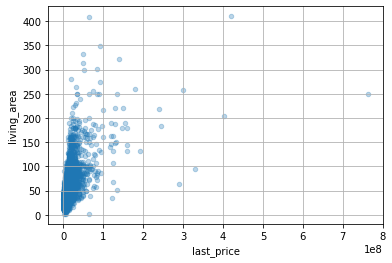

In [8]:
data.plot(x='last_price' ,y='living_area',kind='scatter' ,grid = True,alpha=0.3);

In [9]:
print(data['last_price'].max())
print(data['living_area'].max())

763000000
409.7


Необходимо определиться, что будем считать выбросами

In [10]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [11]:
data['last_price'].median()

4650000.0

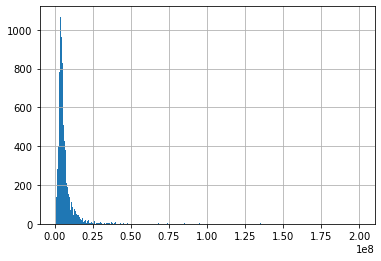

In [12]:
data['last_price'].hist(bins=1000, range=(0, 200*1000000));

По этим графикам видно, что выбросы расположены за пределами **'last_price'** = 100млн. Посмотрим точнее на этот участок графика, а также построим диаграмму размаха, чтобы понять где всё-таки находятся выбросы и аномалии данных.

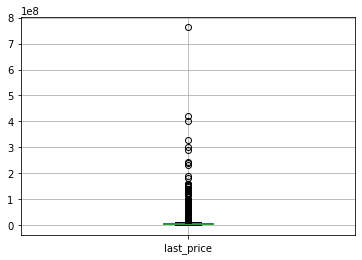

In [13]:
data.boxplot('last_price');

Изменим масштаб, чтобы лучше увидеть "ящик с усами"

(0.0, 20000000.0)

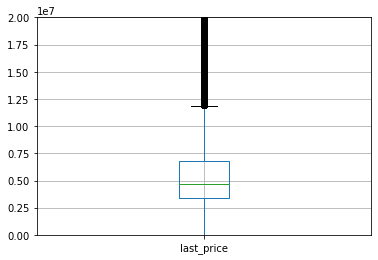

In [14]:
data.boxplot('last_price');
plt.ylim(0 , 20000000)



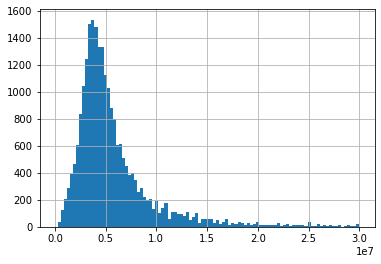

In [15]:
data['last_price'].hist(bins=100, range=(0, 300*100000));

Так данные уже нагляднее. Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 12000000  — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.
И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.


Нетипично высокие цены признаем выбросами и отбросим. 
Примем верхнюю границу в 15000000. Это число кажется разумным: дольше значений куда меньше и они практически сливаются с 0 на гистограмме. Если отбросить значения больше 15000000, много данных не потеряется. 
Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: **data.query('last_price < 15000000')**

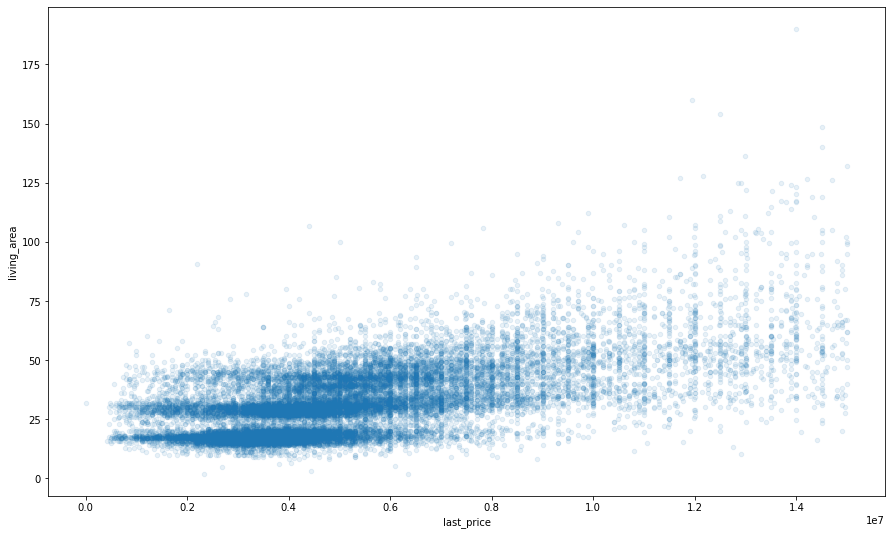

In [16]:
data2=data
data2 = data2.query('last_price < 15000000')
# Посмотрим что получилось теперь:
data2.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1,  figsize = [15, 9]);

In [17]:
# Что случилось с данными теперь:
data2['last_price'].describe()

count    2.245400e+04
mean     5.143570e+06
std      2.685464e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

In [18]:
n1=data['last_price'].count()
n2=data2['last_price'].count()
print('Отброшенные значения -',(n1-n2))
print(f'Выбросы составляют {(n1-n2)/n2:.2%}')

Отброшенные значения - 1245
Выбросы составляют 5.54%


Мы отбросили 1245 значений, что составило 5.54% от всего датасета. Теперь медиана приблизилась к среднему значению, а стандартное отклонение составляет не 10.88 млн, а всего 2.68 млн.


In [19]:
data[(data['last_price'] == data['last_price'].min())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Давайте обратим внимание на слишком дешевую недвижимость. В датасете есть объявление с минимальной ценой 12190 и площадью чуть более 32 кв.м.
Возможно, это предложение по аренде. Добавим условие и о минимальной цене.

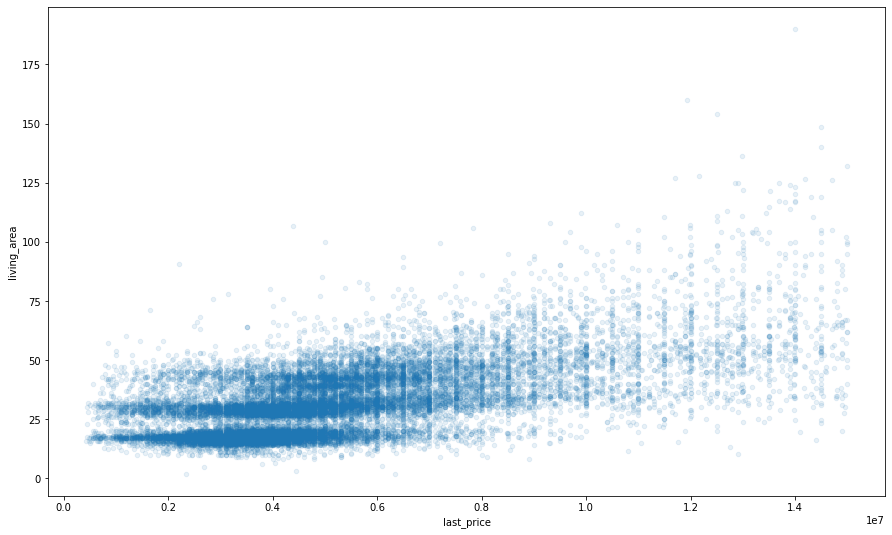

In [20]:
data2 = data2.query('50000 < last_price < 20000000').copy()

data2.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1,  figsize = [15, 9]);



In [21]:
data2['last_price'].describe()

count    2.245300e+04
mean     5.143799e+06
std      2.685305e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

Займемся **first_day_exposition**: это явно дата, но в нечитабельном формате, который стоит привести к "нормальному" виду:

In [22]:
data2['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data2['first_day_exposition'].head(10)

0    2019-03-07
1    2018-12-04
2    2015-08-20
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
Name: first_day_exposition, dtype: datetime64[ns]

Ушли даже ненужные часы, осталась только нужна дата.

Проверим на неявные пропуски, например, нет ли нулей среди значений **'rooms'**:

In [23]:
data2[data2['rooms'] == 0]

def change_zero(x):
    if x == 0:
        return 1
    return x
data2['rooms'] = data2['rooms'].apply(change_zero)
# Посмотрим какие значения теперь в этой колонке:
data2['rooms'].value_counts()

1    8220
2    7763
3    5352
4     890
5     184
6      37
7       7
Name: rooms, dtype: int64

В **ceiling_height** больше 2/3 пропусков.
Cделать замеры самостоятельно мы не можем, но мы сможем заменить их на медиану:

In [24]:
data2['ceiling_height'] = data2['ceiling_height'].fillna(data2['ceiling_height'].median())
data2['ceiling_height'].head(10)

0     2.70
1     2.64
2     2.64
4     3.03
5     2.64
6     2.64
7     2.64
8     2.64
9     2.50
10    2.67
Name: ceiling_height, dtype: float64

In [25]:
data2['ceiling_height'].describe()

count    22453.000000
mean         2.701294
std          0.772278
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

Для анализа потолки в 32м явно не нужны. Посмотрим как выглядят потолки на графике:

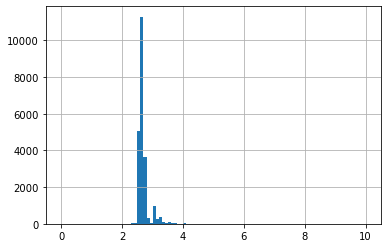

In [26]:
data2['ceiling_height'].hist(bins=100, range=(0, 10));

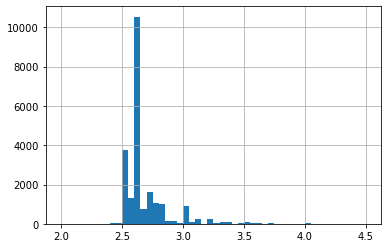

In [27]:
data2['ceiling_height'].hist(bins=50, range=(2, 4.5));

(2.4, 3.0)

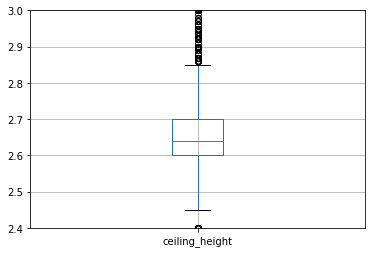

In [28]:
data2.boxplot('ceiling_height');
plt.ylim(2.4, 3)

Из графика очевидно, что почти все значения лежат в пределах 5 метров, а 3-я квартиль говорит, что большая часть лежит в пределах от 2.45 до 2.85 метров. Ограничимся стандартными 2.2 и 4-метровыми потолками для нашего исследования:

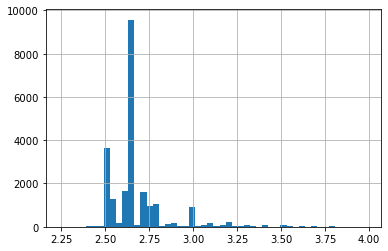

In [29]:
data2 = data2.query('2.2 < ceiling_height < 4')
# Посмотрим как выглядит график теперь:
data2['ceiling_height'].hist(bins=50);

В **floors_total** тоже **float64**, к тому же есть пропущенные значения. 


In [30]:
len(data2[data2['floors_total'].isna()])

81

Всего 81 значений.
Вполне возможно, что в пропусках может быть какая-то логика, например, это 1 этаж.
Посмотрим что содержится в строках с пропущенными значениями:

In [31]:
pd.options.display.max_columns =22
display(data2[data2['floors_total'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.64,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.64,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.64,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.64,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.64,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21753,7,6800000,57.0,2017-05-01,2,2.64,NaN,NaN,21,NaN,False,False,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.64,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.64,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0


In [32]:
print(len(data2[data2['floors_total'].isna() & data2['is_apartment']]))
print(len(data2[data2['floors_total'].isna() & data2['studio']]))
print(len(data2[data2['floors_total'].isna() & data2['open_plan'].isna()]))


0
3
0


Cкорее всего, зависимости никакой нет. Значений меньше процента - на статистику они не повлияют, а вот делать выводы по этим значениям довольно сложно. Из жизненного опыта подбора жилой недвижимости можно вспомнить, что квартиры на нижних этажах по разным причинам проигрывают квартирам на верхних, а здесь этаж не указан вовсе. Выбросим эти значения.

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22361 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22361 non-null  int64         
 1   last_price            22361 non-null  int64         
 2   total_area            22361 non-null  float64       
 3   first_day_exposition  22361 non-null  datetime64[ns]
 4   rooms                 22361 non-null  int64         
 5   ceiling_height        22361 non-null  float64       
 6   floors_total          22280 non-null  float64       
 7   living_area           20610 non-null  float64       
 8   floor                 22361 non-null  int64         
 9   is_apartment          2602 non-null   object        
 10  studio                22361 non-null  bool          
 11  open_plan             22361 non-null  bool          
 12  kitchen_area          20224 non-null  float64       
 13  balcony         

In [34]:
data2 = data2.dropna(subset = ['floors_total']).reset_index(drop = True)


In [35]:
data2['floors_total'] = data2['floors_total'].apply(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22280 entries, 0 to 22279
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22280 non-null  int64         
 1   last_price            22280 non-null  int64         
 2   total_area            22280 non-null  float64       
 3   first_day_exposition  22280 non-null  datetime64[ns]
 4   rooms                 22280 non-null  int64         
 5   ceiling_height        22280 non-null  float64       
 6   floors_total          22280 non-null  int64         
 7   living_area           20560 non-null  float64       
 8   floor                 22280 non-null  int64         
 9   is_apartment          2602 non-null   object        
 10  studio                22280 non-null  bool          
 11  open_plan             22280 non-null  bool          
 12  kitchen_area          20188 non-null  float64       
 13  balcony         

Жилая площадь явно не может быть больше общей, так что пропуски в **living_area** можно 
заменить на среднее значение соотношения жилой площади к общей по категориям.
Разобьем **total_area** на категории чтобы вычислить среднее. Для этого разобьем **total_area** на квартили:

In [36]:
data2['total_area'].describe()

count    22280.000000
mean        55.078026
std         21.755073
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        320.000000
Name: total_area, dtype: float64

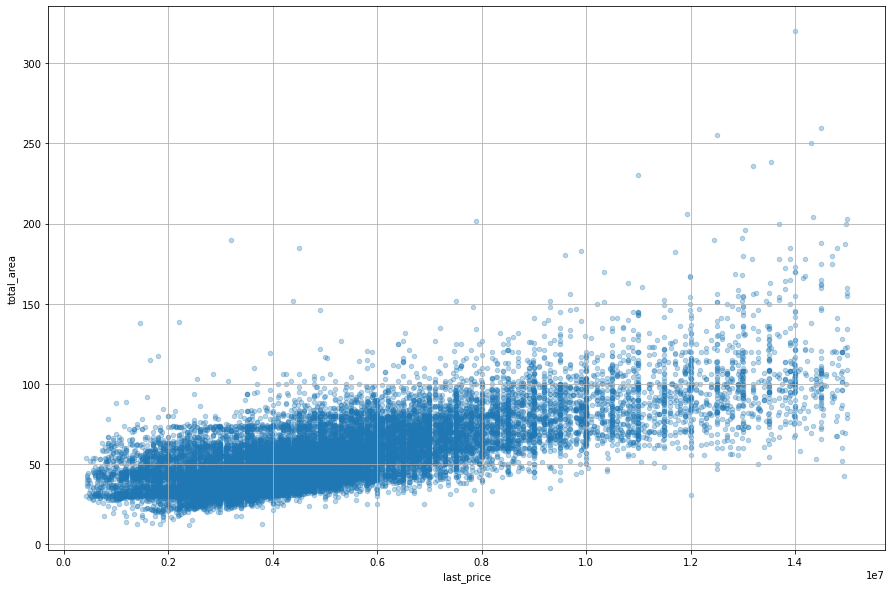

In [37]:
data2.plot(x='last_price', y='total_area', kind = 'scatter', grid = True, alpha = 0.3, figsize=[15,10]);

Почти вся недвижимость имеет площадь до 100 квадратных метров - дальше находятся статистические выбросы, которые никак не помогут в оценке. Запишем это наблюдение в датафрейм с "хорошей" информацией, в котором оставим только недвижимость со статистически важными данными.

In [38]:
data2['total_area'].describe()

count    22280.000000
mean        55.078026
std         21.755073
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        320.000000
Name: total_area, dtype: float64

(0.0, 120.0)

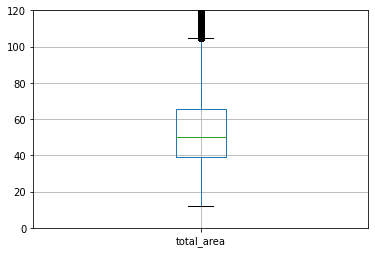

In [39]:
data2.boxplot('total_area');
plt.ylim(0, 120)

(100.0, 110.0)

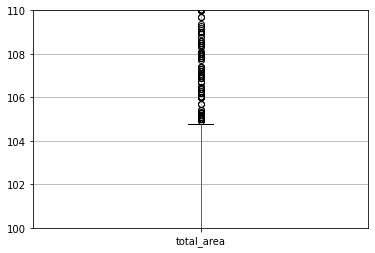

In [40]:
data2.boxplot('total_area');
plt.ylim(100, 110)

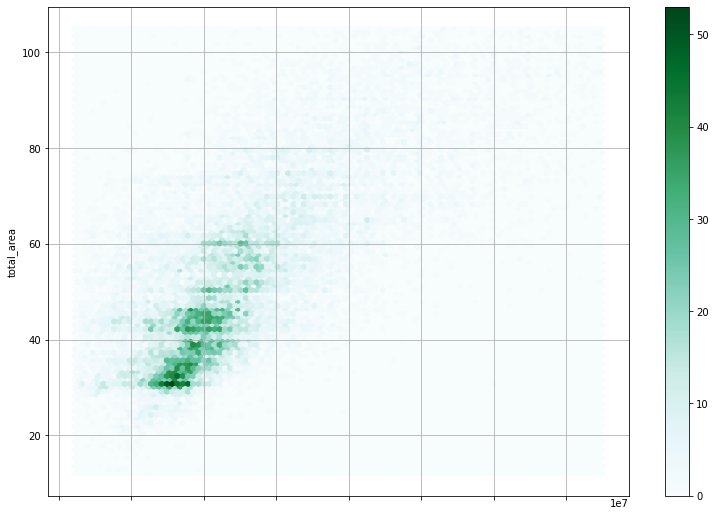

In [41]:
data2 = data2.query('total_area < 105')
data2.plot(x='last_price', y='total_area', kind='hexbin', figsize=[13, 9], grid=True);

Создадим категории для **total_area**:

In [42]:
def group_total_area(x):
    if x < 40:
        return 'до 40 кв.м.'
    if x <= 52:
        return '40 - 52 кв.м.'
    if x <= 70:
        return '52 - 70 кв.м.'
    return 'более 70 кв.м.'

data2['total_area_groups'] = data2['total_area'].apply(group_total_area).copy()
data2['total_area_groups'].head(10)

C:\Users\ruk19\AppData\Local\Temp/ipykernel_5036/1518570321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['total_area_groups'] = data2['total_area'].apply(group_total_area).copy()


1      40 - 52 кв.м.
2      52 - 70 кв.м.
3     более 70 кв.м.
4        до 40 кв.м.
5        до 40 кв.м.
6     более 70 кв.м.
7        до 40 кв.м.
8      52 - 70 кв.м.
9        до 40 кв.м.
10     40 - 52 кв.м.
Name: total_area_groups, dtype: object

In [43]:
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.6,1,NaN,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,40 - 52 кв.м.
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.3,4,NaN,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,52 - 70 кв.м.
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,более 70 кв.м.
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.4,5,NaN,False,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,до 40 кв.м.
5,6,3700000,37.30,2017-11-02,1,2.64,26,10.6,6,NaN,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,до 40 кв.м.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22274,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,NaN,False,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,52 - 70 кв.м.
22276,14,3100000,59.00,2018-01-15,3,2.64,5,38.0,4,NaN,False,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52 - 70 кв.м.
22277,18,2500000,56.70,2018-02-11,2,2.64,3,29.7,1,NaN,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52 - 70 кв.м.
22278,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,False,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,более 70 кв.м.


Создадим сводную таблицу:

In [44]:
pt = data2.pivot_table(index='total_area_groups', values=['living_area', 'total_area'], aggfunc='mean')
pt

,living_area,total_area
total_area_groups,,
40 - 52 кв.м.,25.218618,45.324477
52 - 70 кв.м.,36.071184,60.354289
более 70 кв.м.,48.931176,82.525794
до 40 кв.м.,17.275611,33.585366


In [45]:
pt['avg'] = pt['living_area'] / pt['total_area']
pt

,living_area,total_area,avg
total_area_groups,,,
40 - 52 кв.м.,25.218618,45.324477,0.556402
52 - 70 кв.м.,36.071184,60.354289,0.597657
более 70 кв.м.,48.931176,82.525794,0.592920
до 40 кв.м.,17.275611,33.585366,0.514379


Средние значения по соотношению жилой площади не сильно отличаются. Используем особенность **fillna()** заполнять пропуски из соседних колонок. Создадим колонку для заполнения пропусков:

In [46]:
def func_new_area(x):
    if x == '40 - 52 кв.м.':
        return pt['avg'][0]
    if x == '52 - 70 кв.м.':
        return pt['avg'][1]
    if x == 'более 70 кв.м.':
        return pt['avg'][2]
    if x == 'до 40 кв.м.':
        return pt['avg'][3]
        
data2['mean_group'] = data2['total_area_groups'].apply(func_new_area).copy()
data2['living_area_new'] = data2['mean_group']*data2['total_area']

data2 = data2.drop(columns=['mean_group'])
data2.head(10)

C:\Users\ruk19\AppData\Local\Temp/ipykernel_5036/2892464267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['mean_group'] = data2['total_area_groups'].apply(func_new_area).copy()
C:\Users\ruk19\AppData\Local\Temp/ipykernel_5036/2892464267.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['living_area_new'] = data2['mean_group']*data2['total_area']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,living_area_new
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,NaN,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,40 - 52 кв.м.,22.478630
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.30,4,NaN,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,52 - 70 кв.м.,33.468811
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,более 70 кв.м.,59.291979
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,NaN,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,до 40 кв.м.,15.637125
5,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,NaN,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,до 40 кв.м.,19.186341
6,5,7915000,71.60,2019-04-18,2,2.64,24,NaN,22,NaN,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,более 70 кв.м.,42.453057
7,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,NaN,False,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,до 40 кв.м.,17.056811
8,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,52 - 70 кв.м.,36.457098
9,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,False,...,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,до 40 кв.м.,20.369412
10,9,3300000,44.00,2018-08-27,2,2.64,5,31.00,4,False,False,...,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,40 - 52 кв.м.,24.481677


In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21617 entries, 1 to 22279
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21617 non-null  int64         
 1   last_price            21617 non-null  int64         
 2   total_area            21617 non-null  float64       
 3   first_day_exposition  21617 non-null  datetime64[ns]
 4   rooms                 21617 non-null  int64         
 5   ceiling_height        21617 non-null  float64       
 6   floors_total          21617 non-null  int64         
 7   living_area           19954 non-null  float64       
 8   floor                 21617 non-null  int64         
 9   is_apartment          2512 non-null   object        
 10  studio                21617 non-null  bool          
 11  open_plan             21617 non-null  bool          
 12  kitchen_area          19577 non-null  float64       
 13  balcony         

In [48]:
data2['living_area_new'] = data2['living_area_new'].apply(float)
import numpy as np

data2['living_area_new'] = np.round(data2['living_area_new'], decimals = 2)
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,living_area_new
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.6,1,NaN,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,40 - 52 кв.м.,22.48
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.3,4,NaN,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,52 - 70 кв.м.,33.47
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,более 70 кв.м.,59.29
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.4,5,NaN,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,до 40 кв.м.,15.64
5,6,3700000,37.30,2017-11-02,1,2.64,26,10.6,6,NaN,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,до 40 кв.м.,19.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22274,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,NaN,False,...,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,52 - 70 кв.м.,37.29
22276,14,3100000,59.00,2018-01-15,3,2.64,5,38.0,4,NaN,False,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52 - 70 кв.м.,35.26
22277,18,2500000,56.70,2018-02-11,2,2.64,3,29.7,1,NaN,False,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52 - 70 кв.м.,33.89
22278,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,более 70 кв.м.,45.51


In [49]:
data2['living_area'] = data2['living_area'].fillna(data2['living_area_new'])
data2 = data2.drop(columns=['living_area_new'])
data2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,NaN,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,40 - 52 кв.м.
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.30,4,NaN,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,52 - 70 кв.м.
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,более 70 кв.м.
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,NaN,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,до 40 кв.м.
5,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,NaN,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,до 40 кв.м.
6,5,7915000,71.60,2019-04-18,2,2.64,24,42.45,22,NaN,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,более 70 кв.м.
7,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,NaN,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,до 40 кв.м.
8,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,52 - 70 кв.м.
9,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,до 40 кв.м.
10,9,3300000,44.00,2018-08-27,2,2.64,5,31.00,4,False,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,40 - 52 кв.м.


Проверим чтобы ничего не осталось:

In [50]:
data2[(data2['living_area'].isna())]['last_price'].count()

0

Теперь is_apartment. Посмотрим какие уникальные значения там есть:

In [51]:
data2['is_apartment'].unique()

array([nan, False, True], dtype=object)

Предположим, что пропущенные значения - это **False**. Скорее всего, при заполнении люди просто пропускали это значение.

In [52]:
data2['is_apartment'] = data2['is_apartment'].fillna(False)
data2['is_apartment'].unique()

array([False,  True])

Следующий на очереди **studio**. Посмотрим какие уникальные значения есть в этом столбце:

In [53]:
data2['studio'].unique()

array([False,  True])

и **open_plan**:

In [54]:
data2['open_plan'].unique()

array([False,  True])

В **kitchen_area** есть пропуски. Может ли где-то не быть кухни? Возможно, это означает что где-то есть свободная планировка. 
Проведем проверку на соответствие пропусков и свободной планировки:

In [55]:
data2[(data2['kitchen_area'].isna())]['last_price'].count()

2040

2040 строк в **kitchen_area** с пропущенными значениями. Сколько совпадений со свободной планировкой?

In [56]:
data2[(data2['kitchen_area'].isna() == True) & (data2['open_plan'] == True)].shape

(64, 23)

Нельзя сказать, что есть какая-то зависимость между размером кухни и ценой. 
Посмотрим что на это скажет коэффициент корреляции Пирсона:

In [57]:
data2['last_price'].corr(data2['kitchen_area'])

0.5043700559533064

Корреляция умеренная и с ценой скорее всего её нет. Заполним пропущенные значения нулями - будем считать, что эти помещения без явно выраженных кухонь.

In [58]:
data2['kitchen_area'] = data2['kitchen_area'].fillna(0)

Балкон. Какие уникальные значения есть здесь?

In [59]:
data2['balcony'].unique()

array([ 2.,  0., nan,  1.,  5.,  4.,  3.])

In [60]:
data2['balcony'].isna().sum()

10375

Заполним пропуски нулями и превратим **float** в **int**. Это придется проделать для целого ряда столбцов, поэтому напишем функцию:

In [67]:
def fillna_and_ints(x):
    data2[x] = data2[x].fillna(0)
    data2[x] = data2[x].astype('int')
    print(data2[x].isna().sum())

fillna_and_ints('balcony')

0


И посмотрим снова, теперь все должно быть в порядке:

In [63]:
data2['balcony'].unique()

array([2, 0, 1, 5, 4, 3])

In [68]:
change = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for column in change:
    fillna_and_ints(column)

0
0
0
0
0
0


Заполним пропуски в **locality_name**:

In [69]:
data2['locality_name'] = data2['locality_name'].fillna('Другой')

Последняя колонка датафрейма - сколько дней объявление "висит" в продаже. Здесь есть и пропуски, и требуется преобразовать тип данных.
Основной вопрос для размышлений - что означают эти пропуски. Ожидаемо будет увидеть здесь распредлеение Пуассона на графике.
Посчитаем пропущенные значения:

In [71]:
data2['days_exposition'].isna().sum()

2679

И эти значения лучше отбросить, так как нет понимания когда они фактически были закрыты.

In [79]:
data2.dropna(subset=['days_exposition'], inplace=True)
data2['days_exposition'] = data2['days_exposition'].astype('int')
data2 = data2.reset_index(drop=True)
data2['days_exposition'].shape

(18938,)

In [80]:
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,11.0,2,посёлок Шушары,12817,18603,0,0,0,0,81,40 - 52 кв.м.
1,10,5196000,56.00,2015-08-20,2,2.64,5,34.30,4,False,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,52 - 70 кв.м.
2,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,более 70 кв.м.
3,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,9.1,0,городской посёлок Янино-1,0,0,0,0,0,0,55,до 40 кв.м.
4,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,14.4,1,посёлок Парголово,52996,19143,0,0,0,0,155,до 40 кв.м.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18933,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,False,...,10.6,1,Санкт-Петербург,19424,4489,0,0,1,806,519,более 70 кв.м.
18934,2,1350000,30.00,2017-07-07,1,2.64,5,17.50,4,False,False,...,6.0,0,Тихвин,0,0,0,0,0,0,413,до 40 кв.м.
18935,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,...,8.0,0,Петергоф,45602,34104,1,352,1,675,239,52 - 70 кв.м.
18936,14,3100000,59.00,2018-01-15,3,2.64,5,38.00,4,False,False,...,8.5,0,Тосно,0,0,0,0,0,0,45,52 - 70 кв.м.


Заглянем что в колонке **days_exposition**:

count    18938.000000
mean       172.545834
std        210.817058
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64


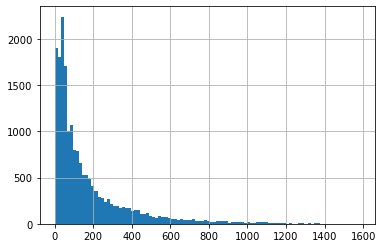

In [82]:
data2['days_exposition'].hist(bins=100);
print(data2['days_exposition'].describe())

(0.0, 500.0)

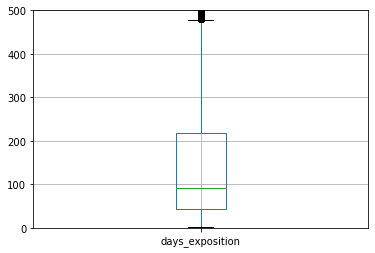

In [85]:
data2.boxplot('days_exposition')
plt.ylim(0, 500)

Как и ожидалось, мы видим Пуассоновское распределение на графике. Есть объявление, которое провисело день, но большая часть объявлений висит до 15 месяцев - далее идет "хвост". "Рекордсмен" среди объявлений провисел 4.4 года. Большая часть недвижимости снимается с доски объявлений в диапазоне от 44 до 218 дней. Обратим внимание, что стандартное отклонение - 210 дней - это почти значение третьей квартили.

In [89]:
d_pivot = data2.pivot_table(index='rooms', values='days_exposition', aggfunc=['count', 'mean'])
d_pivot.columns=['count_days','avg_days']
d_pivot['avg_days'] = d_pivot['avg_days'].astype('int')
d_pivot

,count_days,avg_days
rooms,,
1,7380,157
2,6727,170
3,4262,196
4,528,203
5,38,275
6,2,120
7,1,50


Здесь и графики не нужны: в среднем 1-2 комнатные квартиры продаются за 5-6 месяцев, а недвижимость с более чем 3-мя комнатами - на целый месяц дольше. Теперь дело за малым - "обрубим" "хвост" и оставим только значения в пределах первой и третьей квартилей и посмотрим что стало со сводной таблицей.

In [98]:
data2 = data2.query('44 < days_exposition < 500')

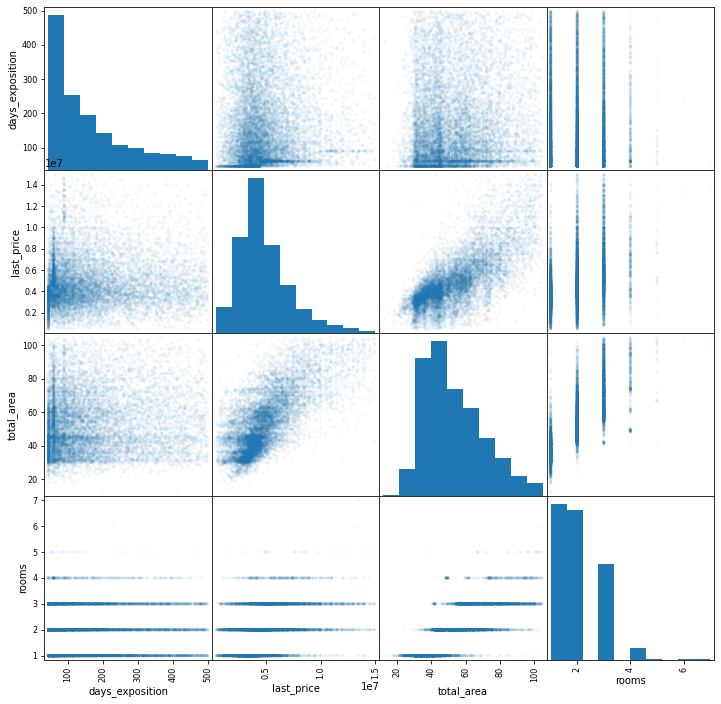

In [96]:
# Добавим к этому набору другие колонки и посмотрим есть ли зависимости от других показателей.
cd = data2[['days_exposition', 'last_price', 'total_area', 'rooms']].copy()
pd.plotting.scatter_matrix(cd, figsize=(12, 12), alpha=0.05);

In [93]:
cd.corr()

,days_exposition,last_price,total_area,rooms
days_exposition,1.000000,0.044647,0.066644,0.049282
last_price,0.044647,1.000000,0.710230,0.424326
total_area,0.066644,0.710230,1.000000,0.796772
rooms,0.049282,0.424326,0.796772,1.000000


Отлично, теперь по графикам можно сделать некоторые выводы:

* Первая и самая легкая визуальная зависимость - чем больше площадь, тем выше цена.
* Чуть менее явная зависимость - чем дешевле недвижимость, тем меньше она "висит" в объявлениях.
* По матрице коэффициентов Пирсона с некоторой очевидностью можно сделать вывод,что с увеличением комнат растет и площадь. Не слишком полезно.



In [97]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12625 entries, 0 to 18936
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          12625 non-null  int64         
 1   last_price            12625 non-null  int64         
 2   total_area            12625 non-null  float64       
 3   first_day_exposition  12625 non-null  datetime64[ns]
 4   rooms                 12625 non-null  int64         
 5   ceiling_height        12625 non-null  float64       
 6   floors_total          12625 non-null  int64         
 7   living_area           12625 non-null  float64       
 8   floor                 12625 non-null  int64         
 9   is_apartment          12625 non-null  bool          
 10  studio                12625 non-null  bool          
 11  open_plan             12625 non-null  bool          
 12  kitchen_area          12625 non-null  float64       
 13  balcony         

Таким образом, мы завершили предобработку данных и можем приступить к анализу для ответов на поставленные вопросы, а результаты можно использовать в EDA.


# Этап 3

## Посчитайте и добавьте в таблицу

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [100]:
# Добавим цену квадратного метра:
data2['m2_price'] = data2['last_price'] / data2['total_area']
data2['m2_price'] = data2['m2_price'].astype('int')
data2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,m2_price
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,2,посёлок Шушары,12817,18603,0,0,0,0,81,40 - 52 кв.м.,82920
2,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,более 70 кв.м.,100000
3,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,0,городской посёлок Янино-1,0,0,0,0,0,0,55,до 40 кв.м.,95065
4,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,1,посёлок Парголово,52996,19143,0,0,0,0,155,до 40 кв.м.,99195
5,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,False,...,0,посёлок Мурино,0,0,0,0,0,0,189,до 40 кв.м.,87454
6,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,2,Санкт-Петербург,50898,15008,0,0,0,0,289,52 - 70 кв.м.,88524
7,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,0,Санкт-Петербург,38357,13878,1,310,2,553,137,до 40 кв.м.,127525
9,10,3890000,54.00,2016-06-30,2,2.64,5,30.00,5,False,False,...,0,Сертолово,0,0,0,0,0,0,90,52 - 70 кв.м.,72037
10,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,False,...,1,Петергоф,37868,33058,1,294,3,298,366,40 - 52 кв.м.,82943
11,1,4400000,36.00,2016-06-23,1,2.64,6,17.00,1,False,False,...,0,Пушкин,20782,30759,0,0,1,96,203,до 40 кв.м.,122222


In [102]:
# Добавим день недели, месяц и год публикации:
from datetime import date
data2['exp_weekday'] = data2['first_day_exposition'].dt.weekday
data2['exp_month'] = data2['first_day_exposition'].dt.month
data2['exp_year'] = data2['first_day_exposition'].dt.year
data2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,m2_price,exp_weekday,exp_month,exp_year
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,18603,0,0,0,0,81,40 - 52 кв.м.,82920,1,12,2018
2,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,8098,2,112,1,48,121,более 70 кв.м.,100000,1,6,2018
3,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,0,0,0,0,0,55,до 40 кв.м.,95065,0,9,2018
4,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,19143,0,0,0,0,155,до 40 кв.м.,99195,3,11,2017
5,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,False,...,0,0,0,0,0,189,до 40 кв.м.,87454,2,5,2018
6,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,15008,0,0,0,0,289,52 - 70 кв.м.,88524,6,2,2017
7,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,13878,1,310,2,553,137,до 40 кв.м.,127525,3,11,2017
9,10,3890000,54.00,2016-06-30,2,2.64,5,30.00,5,False,False,...,0,0,0,0,0,90,52 - 70 кв.м.,72037,3,6,2016
10,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,False,...,33058,1,294,3,298,366,40 - 52 кв.м.,82943,5,7,2017
11,1,4400000,36.00,2016-06-23,1,2.64,6,17.00,1,False,False,...,30759,0,0,1,96,203,до 40 кв.м.,122222,3,6,2016


Добавим категории этажности: первый, последний, другой. Напишем функцию для добавления колонки с категорией и применим её к датафрейму:

In [107]:
def floor_func(data):
    floors_total = data['floors_total']
    floor = data['floor']
    if floor == 1:
        return 'Первый'
    if floor == floors_total:
        return 'Последний'
    return 'Другой'

data2['floor_category'] = data2.apply(floor_func, axis=1)
data2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,m2_price,exp_weekday,exp_month,exp_year,floor_category
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,0,0,0,0,81,40 - 52 кв.м.,82920,1,12,2018,Первый
2,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,2,112,1,48,121,более 70 кв.м.,100000,1,6,2018,Другой
3,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,0,0,0,0,55,до 40 кв.м.,95065,0,9,2018,Другой
4,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,0,0,0,0,155,до 40 кв.м.,99195,3,11,2017,Другой
5,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,False,...,0,0,0,0,189,до 40 кв.м.,87454,2,5,2018,Другой
6,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,0,0,0,0,289,52 - 70 кв.м.,88524,6,2,2017,Другой
7,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,1,310,2,553,137,до 40 кв.м.,127525,3,11,2017,Другой
9,10,3890000,54.00,2016-06-30,2,2.64,5,30.00,5,False,False,...,0,0,0,0,90,52 - 70 кв.м.,72037,3,6,2016,Последний
10,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,False,...,1,294,3,298,366,40 - 52 кв.м.,82943,5,7,2017,Последний
11,1,4400000,36.00,2016-06-23,1,2.64,6,17.00,1,False,False,...,0,0,1,96,203,до 40 кв.м.,122222,3,6,2016,Первый


Добавим соотношение жилой площади к общей. Мы уже сделали сводную таблицу в разделе предобработки данных.

In [112]:
data2['living_area_ratio'] = (data2['living_area'] / data2['total_area']).round(decimals=3)
data2['kitchen_area_ratio'] = (data2['kitchen_area'] / data2['total_area']).round(decimals=3)
data2[data2['kitchen_area_ratio'] == 0]['kitchen_area_ratio'].count()

1323

In [110]:
data2 = data2.reset_index(drop=True)
data2.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,m2_price,exp_weekday,exp_month,exp_year,floor_category,living_area_ratio,kitchen_area_ratio
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,0,0,81,40 - 52 кв.м.,82920,1,12,2018,Первый,0.460,0.272
1,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,1,48,121,более 70 кв.м.,100000,1,6,2018,Другой,0.320,0.410
2,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,0,0,55,до 40 кв.м.,95065,0,9,2018,Другой,0.474,0.299
3,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,0,0,155,до 40 кв.м.,99195,3,11,2017,Другой,0.284,0.386
4,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,False,...,0,0,189,до 40 кв.м.,87454,2,5,2018,Другой,0.465,0.266
5,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,...,0,0,289,52 - 70 кв.м.,88524,6,2,2017,Другой,0.715,0.107
6,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,...,2,553,137,до 40 кв.м.,127525,3,11,2017,Другой,0.513,0.215
7,10,3890000,54.00,2016-06-30,2,2.64,5,30.00,5,False,False,...,0,0,90,52 - 70 кв.м.,72037,3,6,2016,Последний,0.556,0.167
8,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,False,...,3,298,366,40 - 52 кв.м.,82943,5,7,2017,Последний,0.631,0.121
9,1,4400000,36.00,2016-06-23,1,2.64,6,17.00,1,False,False,...,1,96,203,до 40 кв.м.,122222,3,6,2016,Первый,0.472,0.222


# Этап 4

## Проведите исследовательский анализ данных и выполните инструкции

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Изучить следующие параметры: площадь, цену, число комнат, высоту потолков.

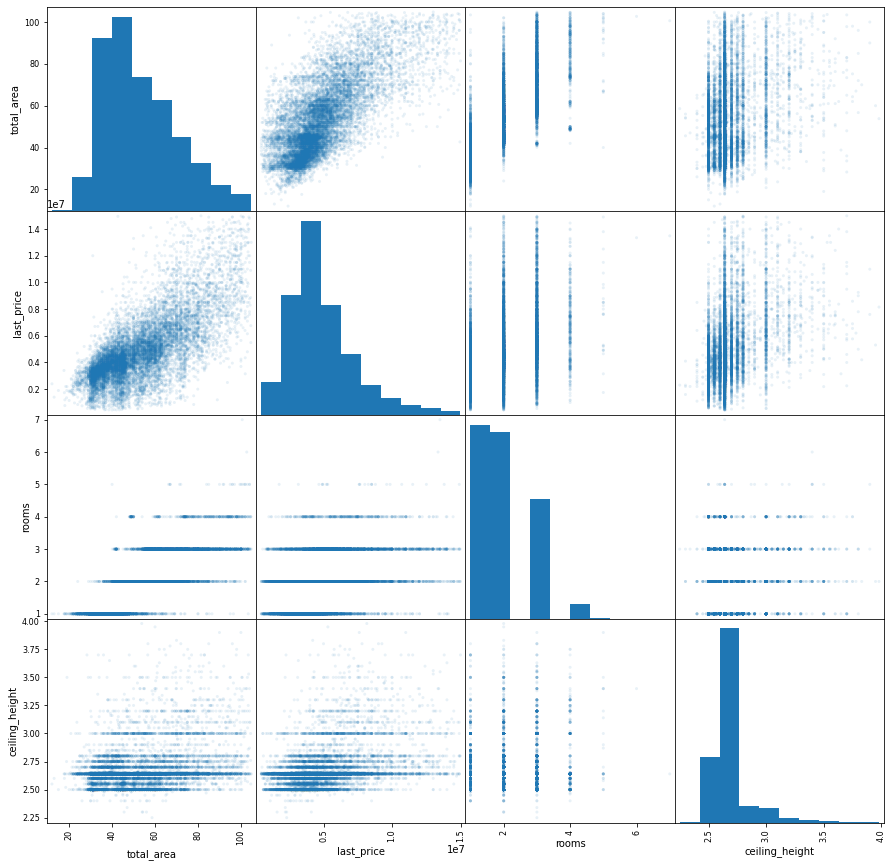

In [114]:
# Сделаем копию датасета для изучения:
params_4 = data2[['total_area', 'last_price', 'rooms', 'ceiling_height']].copy()
# Построим матрицу рассеяния для того, чтобы изучить эти параметры:
pd.plotting.scatter_matrix(params_4, figsize=(15, 15), alpha=0.1);

In [115]:
params_4.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.710230,0.796772,0.269274
last_price,0.710230,1.000000,0.424326,0.360503
rooms,0.796772,0.424326,1.000000,0.092763
ceiling_height,0.269274,0.360503,0.092763,1.000000


## Вывод

Распределение **total_area и last_price** похоже на распределение Пуассона - это здоровая ситуация. Однако, в данных по потолкам были пропуски и мы заменили их на медиану - для того, чтобы не выкидывать почти треть датасета.
Логично выглядят ценовые графики: чем больше площадь, тем больше и цена. Чем больше комнат, тем выше и цена. Явно, что с увеличением площади увеличивается и её стоимость - потому что больше площадь, как правило. Вот от высоты потолка, похоже, цена зависит не слишком сильно.
Самые высокие потолки - в 2-х и 3-х комнатных квартирах. 

**Изучить время продажи квартиры.**

Построить гистограмму.
Посчитать среднее и медиану.
Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

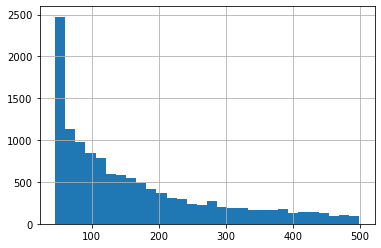

In [116]:
data2['days_exposition'].hist(bins=30);

In [117]:
data2['days_exposition'].describe()

count    12625.000000
mean       163.423762
std        116.238370
min         45.000000
25%         69.000000
50%        123.000000
75%        224.000000
max        499.000000
Name: days_exposition, dtype: float64

## Вывод

Медиана - 123, а среднее - 163.
Обычно продажа занимает более сотни дней или 4-5 месяцев. Исходя из данных, полученных ранее и по отсеченным выборосам - все что продается дольше 500 дней - продается долго, а все что продаётся меньше 45 дней - может считаться проданным быстро.

**Какие факторы больше всего влияют на стоимость квартиры?**

Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Поскольку задача по влиянию этажа стоит как влияние "первого или последнего", создадим копию датасета
и дополним её колонкой **first_last**, так как по типу данных object графика не построишь.

In [119]:
d3 = data2[['last_price', 'rooms', 'floor_category', 'cityCenters_nearest']].copy()
d4 = d3[d3['floor_category'] != 'Другой'].copy()

In [120]:
d4['floor_category'].unique()

array(['Первый', 'Последний'], dtype=object)

Заменим в s_price_influence_data названия этажей на 0 и 1, где 0 - это первый этаж:

In [121]:
def change_floor_category(row):
    floor_category = row['floor_category']
    if floor_category == 'Первый':
        return 0
    if floor_category == 'Последний':
        return 1
    return

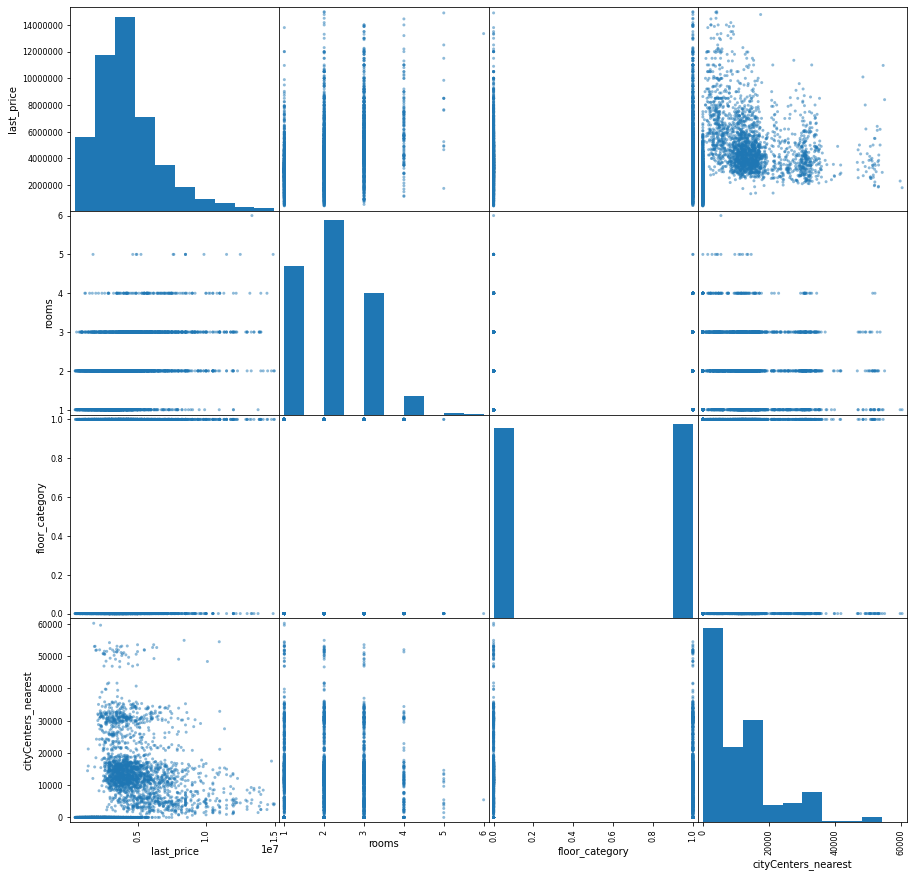

In [122]:
d4['floor_category'] = d4.apply(change_floor_category, axis=1)
pd.plotting.scatter_matrix(d4, figsize=(15, 15), alpha=0.5);

In [123]:
d4.corr()

,last_price,rooms,floor_category,cityCenters_nearest
last_price,1.000000,0.406816,0.115585,0.158970
rooms,0.406816,1.000000,-0.021651,-0.019270
floor_category,0.115585,-0.021651,1.000000,-0.020527
cityCenters_nearest,0.158970,-0.019270,-0.020527,1.000000


Попробуем посмотреть что же происходит с ценой в завиимости от дня недели, месяца и года:

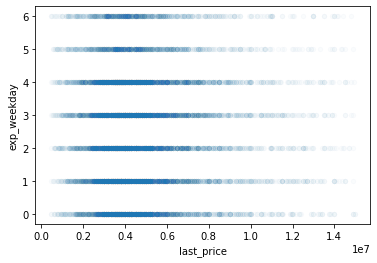

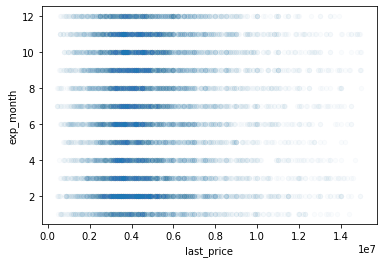

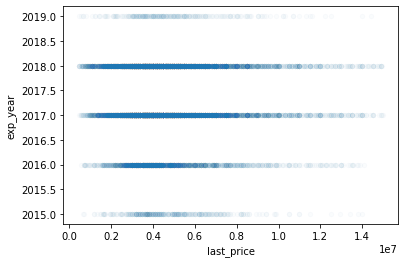

In [124]:
dmy_dependency = data2[['last_price', 'exp_weekday', 'exp_month', 'exp_year']].copy()

# Нам нужны только три графика. С помощью цикла выведем их на экран:
date_list = ['exp_weekday', 'exp_month', 'exp_year']
for row in date_list:
    dmy_dependency.plot.scatter(x='last_price', y=row, alpha=0.02)

По графику непонятно что происходит. Лучше укрупнить группы и построить по ним гистограмму:

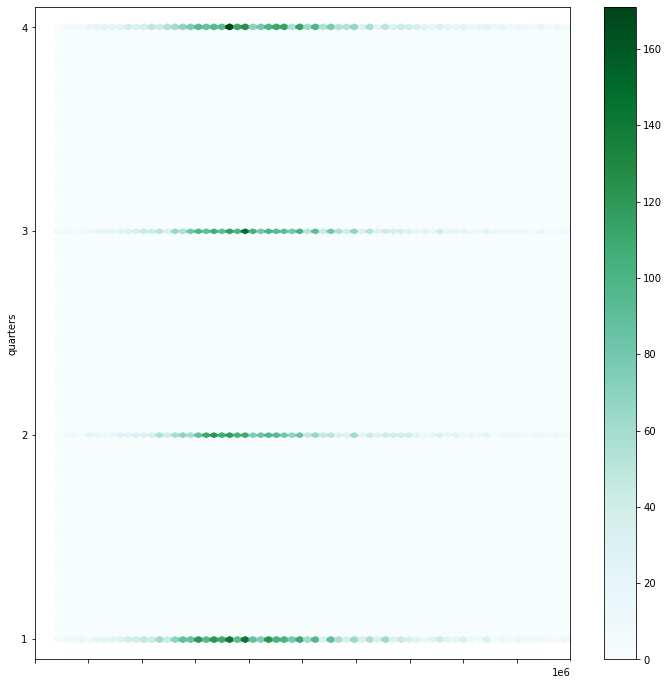

In [130]:
def enlarge_months(row):
    month = row['exp_month']
    if month <= 3:
        return 1
    if 6 >= month >= 4:
        return 2
    if 9 >= month >= 7:
        return 3
    if month >= 10:
        return 4

dmy_dependency['quarters'] = dmy_dependency.apply(enlarge_months, axis=1)
dmy_dependency.plot.hexbin(x='last_price', y='quarters', figsize=[12, 12]);
plt.axis([0, 1e7, 0.9, 4.1]);
plt.xticks(np.arange(0, 1e7, 1000000));
plt.yticks(np.arange(1, 5, 1));

Посмотрим насколько варьируется средняя цена от квартала к кварталу:

In [131]:
dmy_dependency['last_price_mln'] = dmy_dependency['last_price'] / 1000000
dmy_dependency.pivot_table(index='quarters', values='last_price_mln', aggfunc=['mean', 'count'])

,mean,count
,last_price_mln,last_price_mln
quarters,,
1,4.843682,3392
2,4.791819,2858
3,4.910225,3127
4,4.909362,3248


## Вывод

Ранее мы уже сделали вывод, что чем больше комнат, тем дороже недвижимость, потому что чем больше комнат, тем больше площадь.
Больше всего объектов расположено в пределах 20 км от центра. Есть жирная линия с нулями-пропусками, в нижней части графика, на неё мы прсто не будем обращать внимания. Исходя из картинки можно понять, что чем дальше от центра, тем меньше предложений остается. 1-3-комнатная недвижимость явно находится в пределах 40 км от центра, и еще один кластер в пределах 20 км.
По первому графику, построенному по дням недели размещения можно сказать, что в четверг и пятницу с большей вероятностью размещают более дорогую недвижимость, да и в целом по будням размещений больше.
После того, как мы построили график по квараталам, можно с уверенностью сказать, что предложений по недвижимости больше зимой (1 и 4 квартале), а средняя цена размещаемых объявлений выше в 3 и 4 квараталах.

**Выберите 10 населённых пунктов с наибольшим числом объявлений.**

Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце **'locality_name'**.

In [132]:
data2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,total_area_groups,m2_price,exp_weekday,exp_month,exp_year,floor_category,living_area_ratio,kitchen_area_ratio
0,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,False,...,0,0,81,40 - 52 кв.м.,82920,1,12,2018,Первый,0.460,0.272
1,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,...,1,48,121,более 70 кв.м.,100000,1,6,2018,Другой,0.320,0.410
2,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,False,...,0,0,55,до 40 кв.м.,95065,0,9,2018,Другой,0.474,0.299
3,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,...,0,0,155,до 40 кв.м.,99195,3,11,2017,Другой,0.284,0.386
4,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,False,...,0,0,189,до 40 кв.м.,87454,2,5,2018,Другой,0.465,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12620,13,5250000,43.00,2018-05-11,2,2.50,5,29.00,2,False,False,...,2,660,80,40 - 52 кв.м.,122093,4,5,2018,Другой,0.674,0.140
12621,8,3300000,31.00,2017-04-29,1,2.55,9,18.00,6,False,False,...,1,317,193,до 40 кв.м.,106451,5,4,2017,Другой,0.581,0.210
12622,2,1350000,30.00,2017-07-07,1,2.64,5,17.50,4,False,False,...,0,0,413,до 40 кв.м.,45000,4,7,2017,Другой,0.583,0.200
12623,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,False,...,1,675,239,52 - 70 кв.м.,73717,4,8,2016,Другой,0.641,0.128


In [133]:
# Создадим отдельный датафрейм s_re_count (real estate count) куда запишем сводную таблицу по заданию:
s_re_count = data2[['locality_name', 'm2_price']]
s_re_count_pt = s_re_count.pivot_table(index='locality_name', values='m2_price', aggfunc=['mean', 'count'])
s_re_count_pt.columns = ['avg_m2_price', 'number_of_postings']
s_re_count_pt = s_re_count_pt.sort_values(by=['avg_m2_price'], ascending=False)
s_re_count_pt['avg_m2_price'] = s_re_count_pt['avg_m2_price'].apply(int)
s_re_count_pt.head(10)

,avg_m2_price,number_of_postings
locality_name,,
посёлок Лисий Нос,168706,1
Санкт-Петербург,105910,7913
Зеленогорск,103892,14
Сестрорецк,102525,106
Пушкин,98931,200
посёлок Левашово,96997,1
деревня Мистолово,96759,8
Кудрово,96424,90
Другой,93339,33


In [136]:
print(s_re_count_pt[s_re_count_pt['avg_m2_price'] == s_re_count_pt['avg_m2_price'].max()])
print()
print(s_re_count_pt[s_re_count_pt['avg_m2_price'] == s_re_count_pt['avg_m2_price'].min()])

                   avg_m2_price  number_of_postings
locality_name                                      
посёлок Лисий Нос        168706                   1

                    avg_m2_price  number_of_postings
locality_name                                       
деревня Старополье         10684                   2


## Вывод

Самая высокая средняя цена за квадратный метр - в посёлке Лисий Нос, а самая дешевая - в посёлке Совхозный. По одному предложению неправильно было бы сказать, что в посёлке Лисий Нос самая дорогая недвижимость, поэтому можно сказать, что самые дорогие квартиры в основном находятся в Санкт-Петербурге.

**Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра.**

Выделите квартиры в Санкт-Петербурге **('locality_name').**
Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. - После этого посчитайте среднюю цену для каждого километра.
Постройте график: он должен показывать, как цена зависит от удалённости от центра.
Определите границу, где график сильно меняется — это и будет центральная зона.

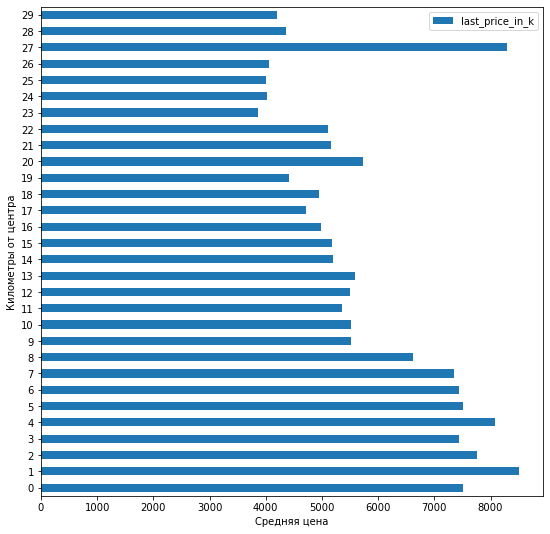

In [140]:
# Выделим Санкт-Петербург:
data_spb = data2.query('locality_name == "Санкт-Петербург"').copy()
# Создадим столбец с расстоянием в километрах и округлим значения до целых:
data_spb['dist_km'] = data_spb['cityCenters_nearest'] / 1000
data_spb['dist_km'] = data_spb['dist_km'].apply(int)
# Запишем сводную в переменную чтобы удобнее было к ней обращаться:
data_spb_pt = data_spb.pivot_table(index='dist_km', values='last_price', aggfunc='mean')
data_spb_pt['last_price_in_k'] = data_spb_pt['last_price'] / 1000
data_spb_pt['last_price_in_k'] = data_spb_pt['last_price_in_k'].apply(int)
# Построим график:
data_spb_pt.plot.barh(y='last_price_in_k', figsize=[9, 9]);
plt.xlabel('Средняя цена');
plt.ylabel('Километры от центра');

## Вывод

Граница проходит на 8 километрах. Можно считать, что все что в пределах этого расстояние - это центр города.

**Выделите сегмент квартир в центре.**

    а)Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
    б)Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
    в)Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

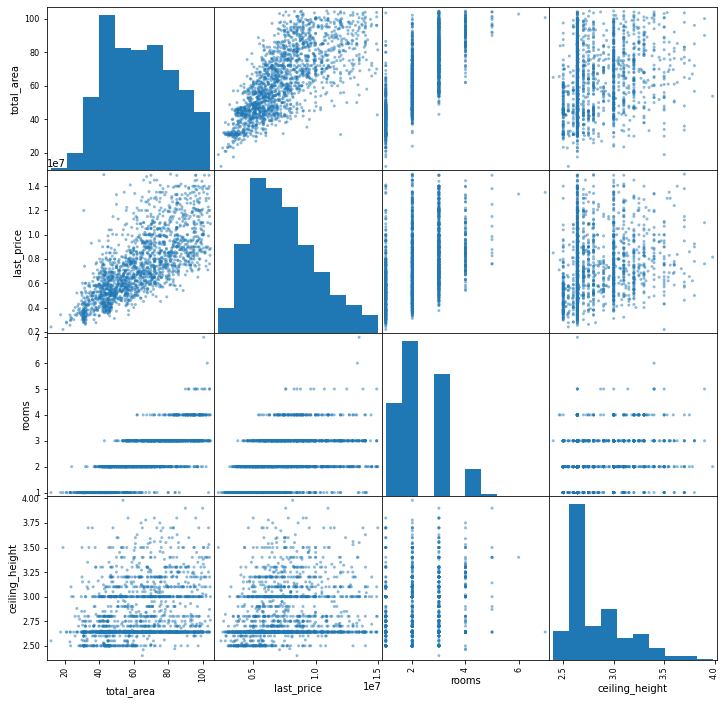

In [142]:
# Выделим по ранее созданному срезу всю недвижимость в пределах 8 километров от центра:
data_center = data_spb.query('dist_km <= 8').copy()
# Выберем только подходящие параметры:
data_center_slice = data_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].copy()
# Построим график:
pd.plotting.scatter_matrix(data_center_slice, figsize=[12, 12]);

In [145]:
# Построим матрицу корреляции по выборке из Санкт-Петербурга:
data_center_slice.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.716880,0.774785,0.240442
last_price,0.716880,1.000000,0.422355,0.189860
rooms,0.774785,0.422355,1.000000,0.207239
ceiling_height,0.240442,0.189860,0.207239,1.000000


In [150]:
# и сравним со средней по городу:
data_city_slice = data2[['total_area', 'last_price', 'rooms', 'ceiling_height']].copy()
data_city_slice.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.710230,0.796772,0.269274
last_price,0.710230,1.000000,0.424326,0.360503
rooms,0.796772,0.424326,1.000000,0.092763
ceiling_height,0.269274,0.360503,0.092763,1.000000


In [159]:
# Выделим факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления.
data_center_slice_f = data_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest','first_day_exposition']]
# Посмотрим на матрицу корреляции:
data_center_slice_f.corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.422355,0.167638,-0.150649
rooms,0.422355,1.000000,-0.146011,-0.161238
floor,0.167638,-0.146011,1.000000,0.270789
cityCenters_nearest,-0.150649,-0.161238,0.270789,1.000000


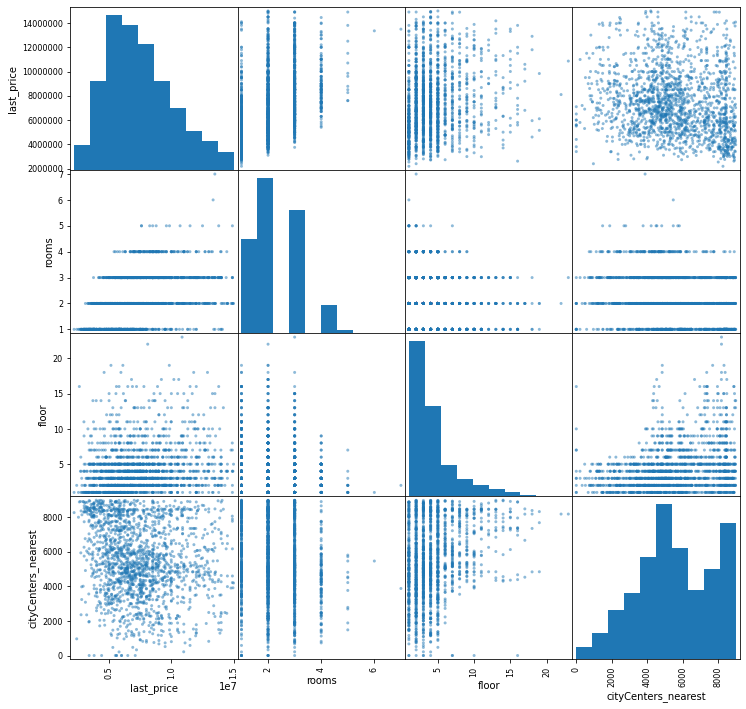

In [160]:
pd.plotting.scatter_matrix(data_center_slice_f, figsize=[12, 12], alpha=0.5);

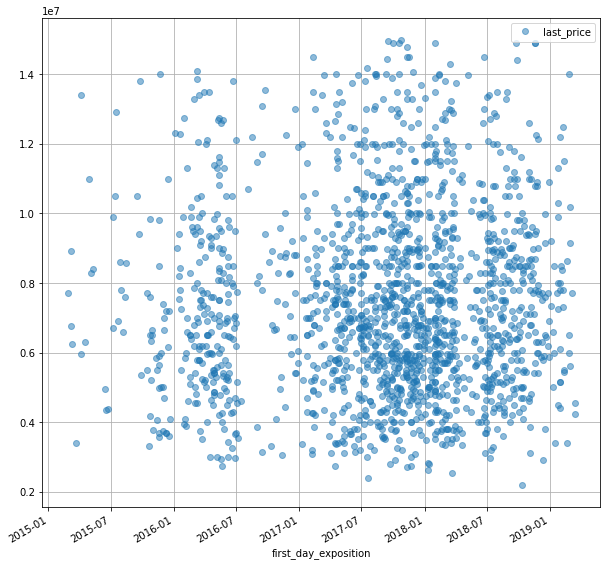

In [161]:
# Теперь построим графики и посмотрим как изменились цены в объявлениях с течением времени: 
data_center_slice_f.plot(x='first_day_exposition', y='last_price',style='o' , grid=True, figsize=[10, 10], alpha=0.5);

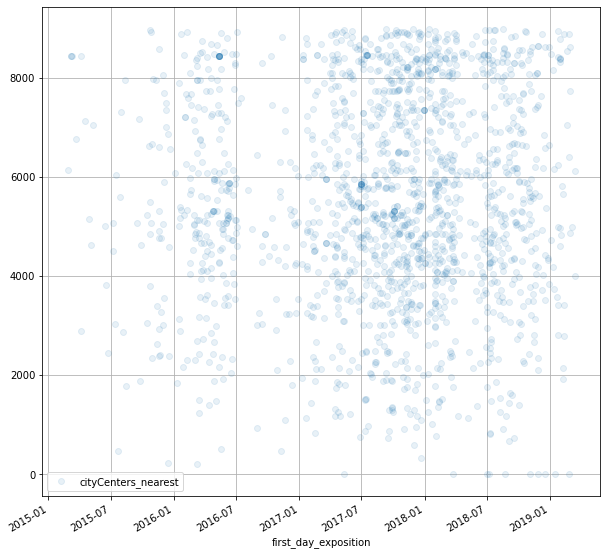

In [162]:
# Сделаем то же самое для удаленности от центра с течением времени: 
data_center_slice_f.plot(x='first_day_exposition', y='cityCenters_nearest', style='o', grid=True, figsize=[10, 10], alpha=0.1);

## Вывод

а) Выводы:

* На графике явно видна зависимость между ценой и общей площадью - чем больше площадь, тем больше цена.
* Есть умеренная корреляция между ценой и количеством комнат. Остальные факторы не слишком сильно влияют на цену - об этом явно свидетельствуют коэффициенты корреляции Пирсона, так как все значения меньше 0.3 считаются слабыми доказательствами в пользу наличия корреляции.
* Интересно, что коэффициенты сильнее по сравнению со срезом по городу в целом.

б) Выводы:

* Можно сделать слабый вывод, что чем больше комнат, тем выше цена.
* Большая часть объявлений - до 15 этажа и 8 млн.
* На более высоких этажах меньше предложений многокомнатной недвижимости.
* Ближе к центру больше многоэтажных зданий.
* С увеличением этажа цена увеличивается. Примерно с 6 этажа начинается резкий скачок в цене - дальше цены не опускаются.

в) Выводы:

* Чем ближе к центру, тем меньше недвижимости продается.
* Предложения распределены совершенно равномерно.
* Если сравнить с предложениями по выборке в целом, то можно понять, что чем ближе к центру, тем больше недвижимости продается, однако это не так для центра.


# Этап 5
# Общий вывод

Мы рассмотрели рынок недвжимости Санкт-Петербурга и ближайших населенных пунктов Ленинградской области. В резульатате исследования были отсечены значения с выбросами, которые искажали бы целостную картину. Основные факторы влияния на рыночную стоимость объектов:

* площадь недвижимости;
* близость к центру;
* количество комнат;
* Центром в Санкт-Петербурге считается все что находится в 8 км от центра. Стоимость квартир в центре может быть любой, а объекты скорее удалены от центра.
